# Anomaly Detection in Voice Conversations

# Approach 1 - Supervised Learning Approach (If you have sufficient dataset)

In [2]:
#Importing Libraries
import librosa
import numpy as np
from sklearn.decomposition import PCA

In [3]:
# Define functions for feature extraction
def extract_mfccs(audio_path):
  y, sr = librosa.load(audio_path)
  mfccs = librosa.feature.mfcc(y=y, sr=sr)
  return mfccs.T

In [5]:
# Load normal call data and combine all features
normal_call_paths=["car-horn.wav", "bus.wav","car-engine.wav","city-bus.wav"]
normal_data = []
for path in normal_call_paths:
  mfccs = extract_mfccs(path)
  print("MFCC:",mfccs)
  normal_data.append(mfccs)

normal_data = np.vstack(normal_data)
print("Entire Normal/train data:", normal_data)

MFCC: [[-5.82853638e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.82853638e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.82853638e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 

In [7]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=10)  
normal_data_compressed = pca.fit_transform(normal_data)
print(normal_data_compressed)

[[373.5035     55.933178   10.023056  ...   4.3183074  -8.320214
   -1.4948279]
 [373.50357    55.933033   10.02305   ...   4.318311   -8.320208
   -1.4948007]
 [373.50357    55.932995   10.023081  ...   4.31832    -8.320189
   -1.4948114]
 ...
 [332.04932    63.634308    9.570944  ...   3.4576983  -8.116045
   -1.3836309]
 [332.04932    63.634308    9.570944  ...   3.4576983  -8.116045
   -1.3836309]
 [332.04932    63.634308    9.570944  ...   3.4576983  -8.116045
   -1.3836309]]


In [9]:
# Define anomaly threshold based on standard deviation
threshold = np.std(normal_data) * 2  # Adjust multiplier for sensitivity
print(threshold)

130.23208618164062


In [10]:
def detect_anomaly(audio_path):
  mfccs_new = extract_mfccs(audio_path) 
  mfccs_new_compressed = pca.transform(mfccs_new)
  print("MFCC for Test Call:",mfccs_new_compressed)

  # Anomaly check
  distance = np.linalg.norm(mfccs_new_compressed)
  if distance > threshold:
    return True  # Anomaly detected
  else:
    return False

# Test on a new call
new_call_path = "bus.wav"
if detect_anomaly(new_call_path):
  print("Anomaly detected in new call!")
else:
  print("New call seems normal.")

MFCC for Test Call: [[323.91745    65.14499     9.482254  ...   3.288892   -8.075995
   -1.3618242]
 [323.91745    65.14499     9.482254  ...   3.288892   -8.075995
   -1.3618242]
 [323.91745    65.14499     9.482254  ...   3.288892   -8.075995
   -1.3618242]
 ...
 [319.53378    59.162193    2.8571856 ...  -3.9680438  -7.993217
   -1.7889074]
 [323.91745    65.14499     9.482254  ...   3.288892   -8.075995
   -1.3618242]
 [323.91745    65.14499     9.482254  ...   3.288892   -8.075995
   -1.3618242]]
Anomaly detected in new call!


# Exploratory Data Analysis - EDA

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

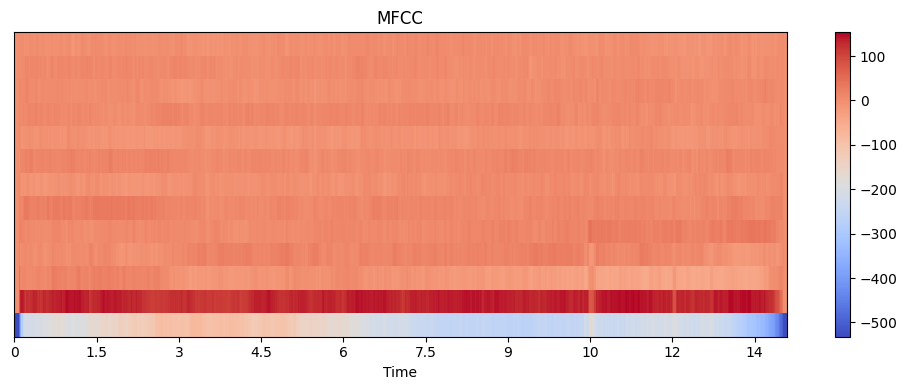

In [2]:
#MFCC PLOT
audio_path='bus.wav'
y, sr = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

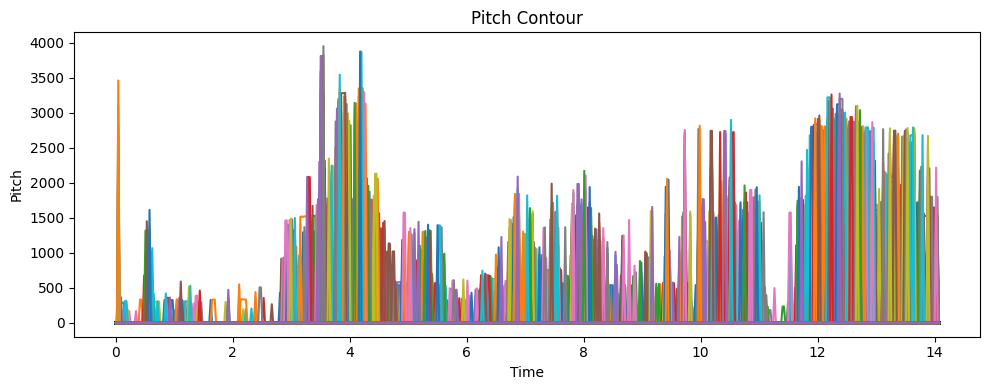

In [5]:
#Pitch Plot
audio_path='bus.wav'
y, sr = librosa.load(audio_path)
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
plt.figure(figsize=(10, 4))
plt.plot(librosa.times_like(pitches), pitches.T)
plt.xlabel('Time')
plt.ylabel('Pitch')
plt.title('Pitch Contour')
plt.tight_layout()
plt.show()

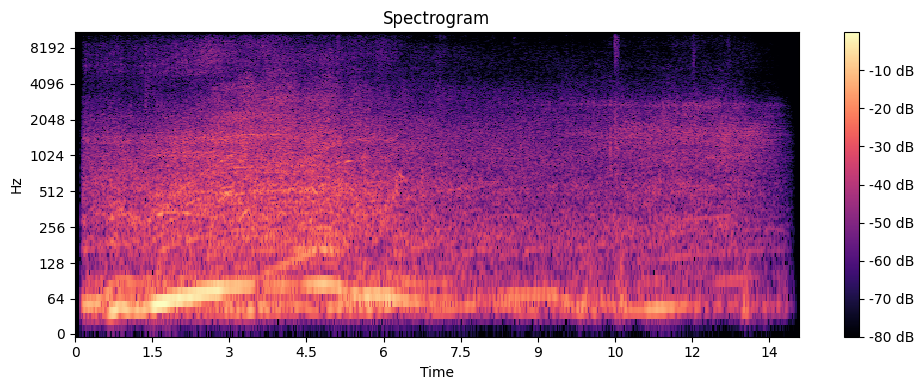

In [6]:
#Spectogram 
y, sr = librosa.load(audio_path)
spectrogram = np.abs(librosa.stft(y))
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

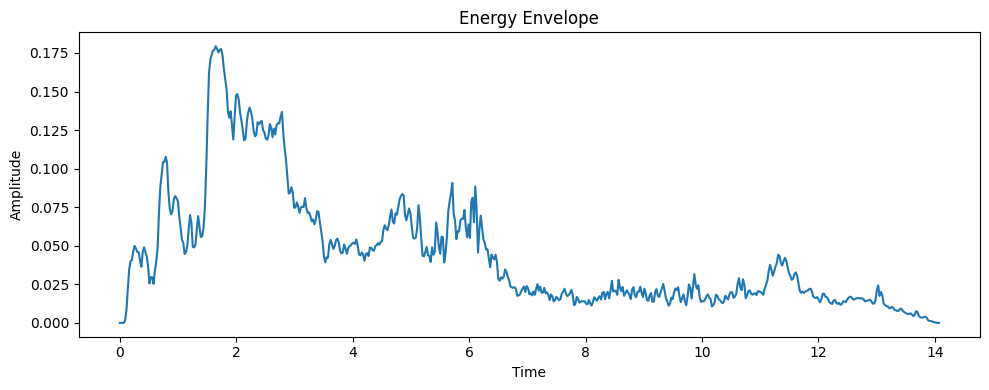

In [7]:
#Energy Envelope
y, sr = librosa.load(audio_path)
energy = np.abs(librosa.stft(y))
energy_envelope = librosa.feature.rms(S=energy)
plt.figure(figsize=(10, 4))
plt.plot(librosa.times_like(energy_envelope), energy_envelope.T)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Energy Envelope')
plt.tight_layout()
plt.show()

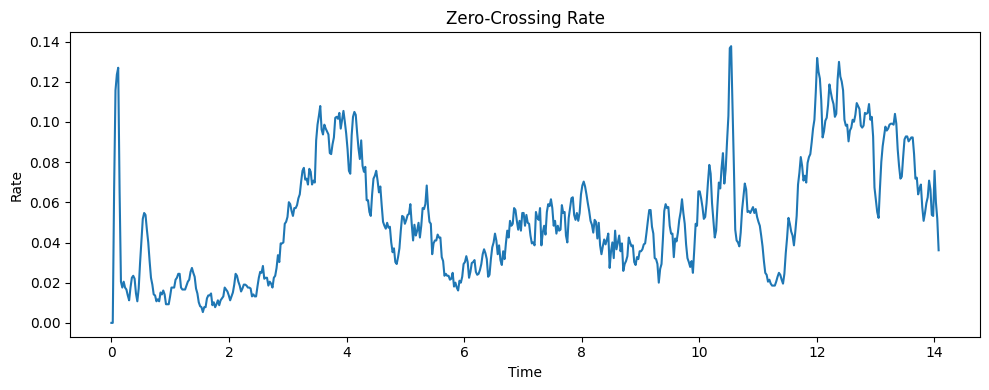

In [8]:
#Zero Crossing rate
y, sr = librosa.load(audio_path)
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
plt.figure(figsize=(10, 4))
plt.plot(librosa.times_like(zero_crossing_rate), zero_crossing_rate.T)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Zero-Crossing Rate')
plt.tight_layout()
plt.show()

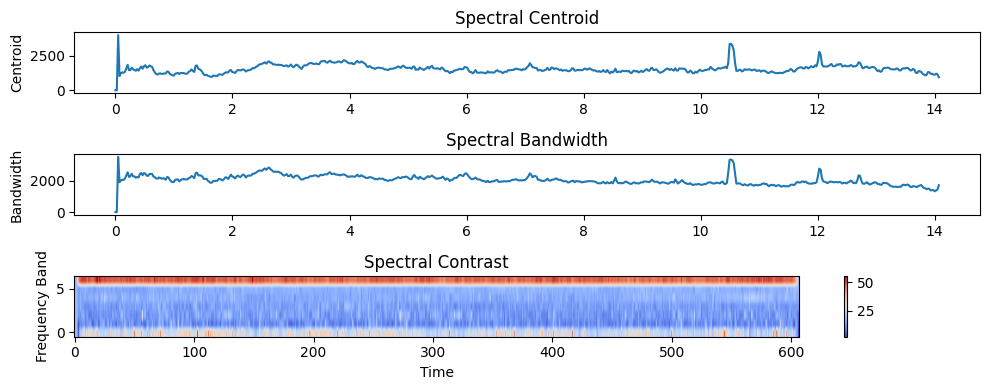

In [9]:
#Spectral Features
y, sr = librosa.load(audio_path)
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
plt.figure(figsize=(10, 4))
plt.subplot(3, 1, 1)
plt.plot(librosa.times_like(spectral_centroid), spectral_centroid.T)
plt.ylabel('Centroid')
plt.title('Spectral Centroid')

plt.subplot(3, 1, 2)
plt.plot(librosa.times_like(spectral_bandwidth), spectral_bandwidth.T)
plt.ylabel('Bandwidth')
plt.title('Spectral Bandwidth')

plt.subplot(3, 1, 3)
plt.imshow(spectral_contrast, aspect='auto', origin='lower', cmap='coolwarm')
plt.colorbar()
plt.ylabel('Frequency Band')
plt.xlabel('Time')
plt.title('Spectral Contrast')

plt.tight_layout()
plt.show()

# Approach 2 - Unsupervised Learning (If you don't have labeled dataset)

In [1]:
import pandas as pd
import numpy as np
import librosa
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [2]:
def extract_audio_features(audio_path):
    try:
        y, sr = librosa.load(audio_path)
    except:
        print("Error: Failed to load audio file.")
        return None
    
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)[0]
    energy = librosa.feature.rms(y=y)[0]
    
    features = np.vstack([mfccs, spectral_centroid, spectral_bandwidth, zero_crossing_rate, energy])
    return features.T

# Principal Component Analysis

In [3]:
def detect_anomaly_pca(features):
    pca = PCA(n_components=10)
    pca.fit(features)
    features_compressed = pca.transform(features)
    distance = np.linalg.norm(features_compressed)
    threshold = np.std(features_compressed) * 2
    return distance > threshold

# Z SCORE

In [4]:
def detect_anomaly_zscore(features):
    z_scores = zscore(features)
    return np.any(np.abs(z_scores) > 3)


# ISOLATION FOREST

In [5]:
def detect_anomaly_isolation_forest(features):
    clf = IsolationForest(contamination=0.05)
    y_pred = clf.fit_predict(features)
    return -1 in y_pred

# LOCAL OUTLIER FACTOR

In [6]:
def detect_anomaly_lof(features):
    clf = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
    y_pred = clf.fit_predict(features)
    return -1 in y_pred

In [9]:
features = extract_audio_features('bus.wav')
if features is not None:
    print("### Extracted Features")
    df_features = pd.DataFrame(features, columns=["Feature {}".format(i+1) for i in range(features.shape[1])])
    print(df_features)

### Extracted Features
      Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0   -532.169128   0.000000   0.000000   0.000000   0.000000   0.000000   
1   -532.169128   0.000000   0.000000   0.000000   0.000000   0.000000   
2   -532.169128   0.000000   0.000000   0.000000   0.000000   0.000000   
3   -531.038818   1.595943   1.588292   1.575594   1.557904   1.535344   
4   -467.109711  73.302025  37.349319  16.543810  14.922649  13.854680   
..          ...        ...        ...        ...        ...        ...   
602 -482.940338  50.609734  15.383812  -0.206172   8.484468  17.240448   
603 -503.102417  31.464596  12.662102   2.500895   5.739389  11.890783   
604 -528.484009   4.989375   4.511615   4.147096   4.078275   4.172524   
605 -532.169128   0.000000   0.000000   0.000000   0.000000   0.000000   
606 -532.169128   0.000000   0.000000   0.000000   0.000000   0.000000   

     Feature 7  Feature 8  Feature 9  Feature 10  Feature 11  Feature 12  \
0     0.0000

In [10]:
selected_method = input("Select Method (PCA/Z-score/Isolation Forest/Local Outlier Factor): ")

Select Method (PCA/Z-score/Isolation Forest/Local Outlier Factor):  PCA


In [11]:
if selected_method == "PCA":
    if features is not None:
        if detect_anomaly_pca(features):
            print("Anomaly detected!")
        else:
            print("No anomaly detected.")
elif selected_method == "Z-score":
    if features is not None:
        if detect_anomaly_zscore(features):
            print("Anomaly detected!")
        else:
            print("No anomaly detected.")
elif selected_method == "Isolation Forest":
    if features is not None:
        if detect_anomaly_isolation_forest(features):
            print("Anomaly detected!")
        else:
            print("No anomaly detected.")
elif selected_method == "Local Outlier Factor":
    if features is not None:
        if detect_anomaly_lof(features):
            print("Anomaly detected!")
        else:
            print("No anomaly detected.")

Anomaly detected!
